In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Applying ImageDataGenerator functionality to trainset
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/cnn/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [ ]:
#Applying ImageDataGenerator functionality to testset
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/cnn/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [ ]:
#import model building libraries

#To define Linear initialisation import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
#To create Convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
#import Maxpooling layer
from tensorflow.keras.layers import MaxPooling2D
#import flatten layer
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#initializing the model
model=Sequential()

In [ ]:
#add convolutional layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer 
model.add(Flatten())

In [ ]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#configure the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train, epochs=5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
14/14 [==============================] - 160s 11s/step - loss: 2.1668 - accuracy: 0.6193 - val_loss: 0.2094 - val_accuracy: 0.9008
Epoch 2/5
14/14 [==============================] - 27s 2s/step - loss: 0.2780 - accuracy: 0.8784 - val_loss: 0.1019 - val_accuracy: 0.9669
Epoch 3/5
14/14 [==============================] - 27s 2s/step - loss: 0.2130 - accuracy: 0.9220 - val_loss: 0.0914 - val_accuracy: 0.9669
Epoch 4/5
14/14 [==============================] - 26s 2s/step - loss: 0.1660 - accuracy: 0.9289 - val_loss: 0.1584 - val_accuracy: 0.9091
Epoch 5/5
14/14 [==============================] - 28s 2s/step - loss: 0.1859 - accuracy: 0.9220 - val_loss: 0.0900 - val_accuracy: 0.9669


In [ ]:
#save the model
model.save("forest.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("/content/drive/MyDrive/dataset/cnn/forest1.h5")

In [ ]:
img=image.load_img("/content/drive/MyDrive/dataset/cnn/Dataset/Dataset/test_set/with fire/Bandipur_fires_2019.jpg",target_size=(64,64))

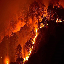

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
#prediction
pred= model.predict(x)

1/1 [==============================] - 0s 24ms/step


In [ ]:
pred

array([[1., 0.]], dtype=float32)

In [ ]:
labels=["with fire","without fire"]

In [ ]:
np.argmax(pred)

0

In [ ]:
labels[np.argmax(pred)]

'with fire'